# CSCI 632 Machine Learning Homework 3 with Answers

**Clarification**

In Problem 1(a), I changed what was requested "Find the risk function for the case where the system chooses to classify the observation (i.e., no rejection), $R(\alpha | \mathbf{x}, \text{choose})$" to "Find the risk function for the case where the system chooses to classify the observation (i.e., no rejection), $R(\alpha_i | \mathbf{x}, \text{choose})$" .  I believe this is clearer.

**Correction 1**

In Problem 1(a), I changed

$$R(\alpha_i|\mathbf{x}, \text{choose}) < R(\alpha_i|\mathbf{x}, \text{reject})$$

to

$$R(\alpha_i|\mathbf{x}, \text{choose}) \leq R(\alpha_i|\mathbf{x}, \text{reject})$$.

Both rules will minimize risk, but this change causes the system to choose the class with label $\omega_i$ when the risk is equal either way, which corresponds to choosing $\omega_i$ when 

$$P(\omega_i | \mathbf{x}) \geq 1 - \frac{\lambda_r}{\lambda_s}$$

**Correction 2**

In Problem 2(e), compute $H(x)$ from $p=0.003$ from (c).  The reference to part (b) is incorrect.  (b) is a plot that
does not specify $p$ and the value from (a) is unrelated to the $p$ value used to
generate the input file. 2(e) was updated to reflect this change.


**Instructions**

* **Insert all code, plots, results, and discussion** into this Jupyter Notebook.
* Your homework should be submitted as a **single Jupyter Notebook** (.ipynb file).
* While working, you use Google Colab by uploading this notebook and performing work there. Once complete, export the notebook as a Jupyter Notebook (.ipynb) and submit it to **Blackboard.**

You can answer mathematical questions either by:
* using LaTeX in a markdown cell, or
* pasting a scanned or photographed handwritten answer.

**Problem 1** (20 pts) Consider the problem of Automatic 
Content Recognition (ACR).  ACR aims to recognize content such as TV
shows, movies, or sports. In this scenario, we treat each piece of
content as a class in a multiclass classification problem, where there
are $K$ known pieces of content. The content may be re-encoded multiple 
times during distribution to adapt to available bandwidth or loss
characteristics, and may be subject to "visual enhancements” by devices
like set-top boxes or TVs, all of which introduce noise. Despite these
distortions, the model must classify the content.

Because video and audio are composed of a steady stream of frames or audio 
samples from which we generate feature vectors $\textbf{x}(t)$ at points in time
$t$, we are not forced to immediately make a decision.  Instead, the ACR system can
choose to *reject* an observation as unrecognizable instead of
misclassifying it. When the cost of rejection is low, it may be
beneficial to reject an observation and wait for more data to
improve classification accuracy.

Let $\lambda$ denote our loss function.

\begin{equation}
\lambda(\alpha_i| \omega_j) =
\begin{cases}
  0 & i = j \text{ for } i, j = 1, ..., K \\
  \lambda_r & i = K + 1 \quad (\text{rejection}) \\
  \lambda_s & \text{if } i \neq j \quad (\text{substitution}) 
\end{cases}
\end{equation}

where 

* $\lambda_r$ is the loss incurred for rejecting the observation
  (i.e., deciding to wait).  Let action $(K+1)$ denote rejection.
* $\lambda_s$ is the loss incurred for a substitution error (i.e.,
  classifying the observation as the wrong content).


**(a)** At decision time, the ACR system must either choose to classify the content into one of the known classes or reject the observation (i.e., postpone the decision). Find the risk function for the case where the system chooses to classify the observation (i.e., no rejection), $R(\alpha_i | \mathbf{x}, \text{choose})$. The risk function represents the expected loss conditioned on the observation $\mathbf{x}$ and the decision to classify.

**Answer (a)**

$$R(\alpha_i | \mathbf{x}, \text{ choose}) = \sum_{j=1}^{K} \lambda(\alpha_i | \omega_j) P(\omega_j | \mathbf{x})\hspace{1in} (1.1)$$

The summation only considers the risk when we choose some class and thus (1.1) does not include $K+1$ in the summation which would correspond to a rejection.  This is the risk for choosing $\alpha_i$ when the true class is $\omega_j$ weighted by the posterior probability that the true class is $\omega_j$.

The above is a correct answer, but we can express this in terms of $\lambda_r$ and $\lambda_s$.

\begin{align}
R(\alpha_i | \mathbf{x}, \text{ choose}) &= \sum_{j \neq i} \lambda(\alpha_i | \omega_j) P(\omega_j | \mathbf{x}) + \lambda(\alpha_i| \omega_i) P(\omega_i | \mathbf{x})\\
    &= \sum_{j \neq i} \lambda_s P(\omega_j | \mathbf{x}) + 0 \cdot P(\omega_i | \mathbf{x})\\
    &= \sum_{j \neq i} \lambda_s P(\omega_j | \mathbf{x}) \\
    &= \lambda_s \sum_{j \neq i} P(\omega_j | \mathbf{x}) \hspace{1in} (1.2) 
\end{align}

Because the classes are mutually exclusive and collectively exhaustive we can apply the law of total probability such that

$$ \sum_{j\neq i} P(\omega_j | \mathbf{x}) = 1 - P(\omega_i | \mathbf{x})\hspace{1in} (1.3)$$

Substituting (1.3) into (1.2) yields

$$R(\alpha_i | \mathbf{x}, \text{choose}) = \lambda_s (1 - P(\omega_i | \mathbf{x}))$$

**(b)** If the risk of classifying the content (i.e., choosing) exceeds the
risk of rejecting the observation, then choosing will increase the overall
risk. To minimize the risk, we should only choose to classify if:

$$R(\alpha_i|\mathbf{x}, \text{choose}) \leq R(\alpha_i|\mathbf{x}, \text{reject})$$

Using this criterion, show that the minimum risk is obtained by classifying
the observation as class $\omega_i$ if:

$$P(\omega_i|\mathbf{x}) \geq P(\omega_j|\mathbf{x}) \text{ for all } j \neq i$$
which means choosing the class with the highest posterior probability.
Furthermore, show that we should classify the observation as $\omega_i$ if

$$P(\omega_i | \mathbf{x}) \geq 1 - \frac{\lambda_r}{\lambda_s}, $$

and reject otherwise.

**Answer (b)**

$R(\alpha|\mathbf{x}, \text{reject}) = \lambda_r$ because we know we chose reject and the cost is thus
the same regardless of the true class.

We thus minimize risk when we choose only if 

\begin{align}
  R(\alpha_i|\mathbf{x}, \text{choose}) &\leq \lambda_r \\
  \lambda_s (1 - P(\omega_i | \mathbf{x})) &\leq \lambda_r \\
  (1 - P(\omega_i | \mathbf{x})) &\leq \frac{\lambda_r}{\lambda_s} \\
  P(\omega_i | \mathbf{x})) &\geq 1-\frac{\lambda_r}{\lambda_s}\hspace{0.5in}\hfill \square
\end{align}


**(c)** What happens to the decisions made when $\lambda_r = 0$?

**Answer (c)** Reject all except when the probability of class $\omega_i$ is 1 for the given $\mathbf{x}$.

"Reject all" is also acceptable given that the problem was originally stated as 
showing $P(\omega_i | \mathbf{x}) > 1 - \frac{\lambda_r}{\lambda_s}$.

**(d)** What happens to the decisions made when $\lambda_r > \lambda_s$?

**Answer (d)** Always decide.   If there the cost of rejecting is higher than the cost of misclassifying then always choose.

**Problem 2**

Given a source that outputs a sequence of zeros and ones.  Each zero or one is called a symbol.  
In this problem, each symbol is independent of the others.  The probability of a 1 is given by
$p$ and thus the probability of a zero is $1-p$.

**(a)** Compute the Shannon entropy for $p=0.3$

**Answer (a)**

\begin{align}
I(x) &= -\log p(x) \\
H(X) &= E[I(x)] = - \sum_{x \in X} P(x) \log P(x)\hspace{2in}(2.1)
\end{align}

We have only two symbols so p = P(x=1) = 0.3. P(x=0) = 0.7.  Substitute these values in to (2.1) to get

$$H(X) = -(0.3 \log_2 0.3 + 0.7 \log_2 0.7) \approx 0.88 ~\text{bits} $$ 


**(b)** Plot the Shannon entropy in bits for many values of $p$ in the interval $[0,1]$.

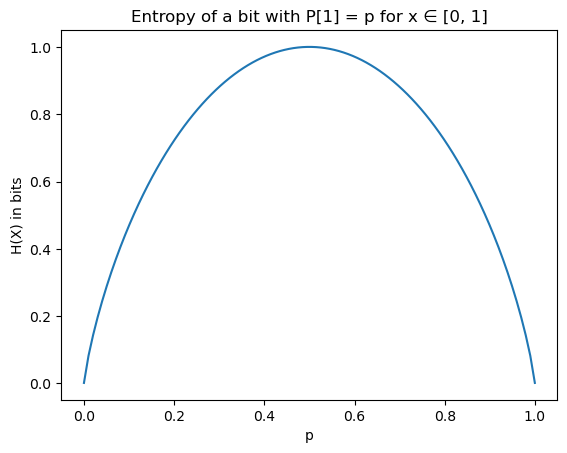

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Generate evenly spaced x values in the range [0, 1]
p = np.linspace(0.0001, 0.9999, 100)
h = -p * np.log2(p) - (1-p) * np.log2(1-p)
plt.plot(p, h)
plt.xlabel('p')
plt.ylabel('H(X) in bits')
plt.title('Entropy of a bit with P[1] = p for x ∈ [0, 1]')
plt.show()

**(c)** Consecutive occurrences of the same symbol are called runs. `000001` is a run
of 5 zeros followed by a 1.  *Run length encoding* 
is sometimes used when the input data is dominated by long runs of the same symbol.
`AAABBBBBEEEE` would be encoded as `3A5B4E`. 

*Zero run length encoding* is a variant typically used with binary sequences
in which the dominant symbol is zero.  We allocate a fixed length field $k$
bits wide to denote the run length of consecutive zeros before a 1.  If all bits
in the field are ones, this is a reserved value indicating an *incomplete run*.

An *incomplete run* occurs when a run of zeros reaches the maximum length
representable by the $k$-bit field, which is $2^k-1$, and continues with
additional zeros without an intervening 1.  In this case, the next field 
encodes the length of the continued run.

For example, if $k=4$, the zero run length encoding creates the given
outputs for the input sequences shown in Table 1.

$$\text{Table 1}$$

| input           |  output      | compression$\dagger$ |  explanation                            |
|-----------------|--------------|-------------|--------------------------------------------------|
| 1               | 0000         | 1/4         | zero zeroes then 1                               |
| 01              | 0001         | 1/2         | one zero then 1                                  |
| 11              | 00000000     | 1/4         | 0 zeroes then 1, 0 zeros then 1                  |
| 0000000001      | 1001         | 9/4=2.25    | $1001_2=9$, 9 zeroes then 1.                     |
| 0010001         | 00100011     | 7/8         | $0010_2=2$ zeroes, $0011_2=3$ zeroes.            |
| 32 zeros then 1 | 111111110010 | 33/12=2.75  | $15(1111_2) + 15(1111_2) + 2 = 32$ zeroes then 1 |


$$\dagger \text{ compression ratio is } \frac{\text{uncompressed size}}{\text{compressed size}}$$

In the last row we reduce 33 input symbols to 12 output symbols.  This has a compression
ratio of $33/12 = 2.75$

For $p=0.003$, (i.e., the probability of a 1 is 0.3%), implement zero run length encoding.  

In [183]:
import io
import unittest
import random

def vassert(exp):
    if not exp:
        raise ValueError()

    
# I chose to follow the design pattern used by zlib and zstandard
# which allows compression parameter to passed as an optional argument
# to a compress method.
#
# Addendum: as described in the original problem, this encoding
# doesn't handle termination properly if the file ends with a zero.
# See the answer for Problem 2(g) for a solution that does.
def compress(data: bytes, k: int = 4) -> bytes:
    vassert(k > 0)
    max_rl = 2**k-1
    rl = 0
    buffer = bytearray()
    
    for d in data:
        c = chr(d)
        if c == '0':
            rl += 1
            if rl == max_rl:
                rlb = bin(rl)[2:].zfill(k).encode('ascii')
                buffer.extend(rlb)
                rl = 0
        elif c == '1':
            rlb = bin(rl)[2:].zfill(k).encode('ascii')
            buffer.extend(rlb)
            rl = 0
    return bytes(buffer)

def decompress(data: bytes, k: int = 4) -> bytes:
    vassert(k > 0)
    max_rl = 2**k-1
    dio = io.BytesIO(data)
    buffer = bytearray()
    rlbytes = b""
    while True:
        rlbytes = dio.read(k)
        if len(rlbytes) == 0:  # EOF
            break
            
        rl = int(rlbytes.decode('ascii'), 2)
        buffer.extend(b"0"*rl)
        if rl != max_rl:
            buffer.append(ord("1"))
    return buffer        

def create_buffer(size, percent_ones):
    num_ones = int((percent_ones / 100) * (size - 1))  # Reserve 1 for the terminating '1'
    num_zeros = size - 1 - num_ones  # Remaining space for zeros
    buffer_list = ['1'] * num_ones + ['0'] * num_zeros

    # Shuffle to randomize the placement of '1's and '0's
    random.shuffle(buffer_list)

    # Append a terminating '1'
    buffer_list.append('1')

    # Join the list into a byte string of ASCII characters
    buffer = ''.join(buffer_list).encode('ascii')
    return buffer

class TestCompress(unittest.TestCase):
    def test_edge_cases(self):
        try:
            compress(None)
            self.assertTrue(False)
        except:
            pass

        try:
            compress(b"010", -1)
            self.assertTrue(False)
        except ValueError:
            pass

        buf = compress(b"")
        self.assertEqual(len(buf), 0)

    def test_simple_cases(self):
        # This does not handle terminating edge condtion well. An ending 0000
        buf = compress(b"1")
        self.assertEqual(buf, b"0000")

        buf = compress(b"01")
        self.assertEqual(buf, b"0001")

        buf = compress(b"11")
        self.assertEqual(buf, b"00000000")

    def test_more_complicated_cases(self):
        buf = compress(b"0000000001")
        self.assertEqual(buf, b"1001")
        
        buf = compress(b"0"*32 + b"1")
        self.assertEqual(buf, b"111111110010")

    def test_decompression(self):
        self.assertEqual(decompress(compress(b"1")), b"1")
        self.assertEqual(decompress(compress(b"01")), b"01")
        self.assertEqual(decompress(compress(b"11")), b"11")

    def test_complicated_decompression(self):
        self.assertEqual(decompress(compress(b"0000000001")), b"0000000001")
        self.assertEqual(decompress(compress(b"0"*32 + b"1")), b"0"*32 + b"1")

    def test_3_percent(self):
        buf = create_buffer(size=1000, percent_ones=3)
        self.assertEqual(decompress(compress(buf)), buf)

    def test_p2c(self):
        with open("p2c.txt", "rb") as fp:
            buf = fp.read()
        self.assertEqual(decompress(compress(buf)), buf)
        
unittest.main(argv=[''], verbosity=2, exit=False)       

test_3_percent (__main__.TestCompress.test_3_percent) ... ok
test_complicated_decompression (__main__.TestCompress.test_complicated_decompression) ... ok
test_decompression (__main__.TestCompress.test_decompression) ... ok
test_edge_cases (__main__.TestCompress.test_edge_cases) ... ok
test_more_complicated_cases (__main__.TestCompress.test_more_complicated_cases) ... ok
test_p2c (__main__.TestCompress.test_p2c) ... ok
test_simple_cases (__main__.TestCompress.test_simple_cases) ... ok
test_decompress2 (__main__.TestCompress2.test_decompress2) ... ok
test_edge_cases (__main__.TestCompress2.test_edge_cases) ... ok
test_simple_cases (__main__.TestCompress2.test_simple_cases) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.068s

OK


I uploaded the file `p2c.txt.gz`.  Decompress this file using `gunzip` before using it.

In [163]:
import os
import glob
print("working directory:", os.getcwd()) 
print("glob(\"*.txt\":", glob.glob("*.txt"))
assert os.path.exists("p2c.txt")

working directory: /Users/dave/olemiss/CSCI632_24F_Instructor/hw3
glob("*.txt": ['p2c_zero_end.txt', 'p2c.txt', 'p2c_k4.txt']


Use your compression algorithm to compress the data file `p2c.txt` that uses ASCII 0
and 1 to denote zeros and ones.  Output the compressed text file with name `p2c_k4.txt`.
The output file should use ASCII zeros and ones, but compress the data using zero run
length encoding with k=4.

In [164]:
with open("p2c.txt", "rb") as fp:
    data = fp.read()
compressed = compress(data, k=4)
assert  decompress(compressed, k=4) == data    
with open("p2c_k4.txt", "wb") as fp:
    fp.write(compressed)


**(d)** Plot the compression ratio of `p2c.txt` using the zero run length encoder 
built in (c) as a function of $k$ for $k \in (4, 16)$.  Put $k$ on the x-axis and
compression ratio on the y-axis.

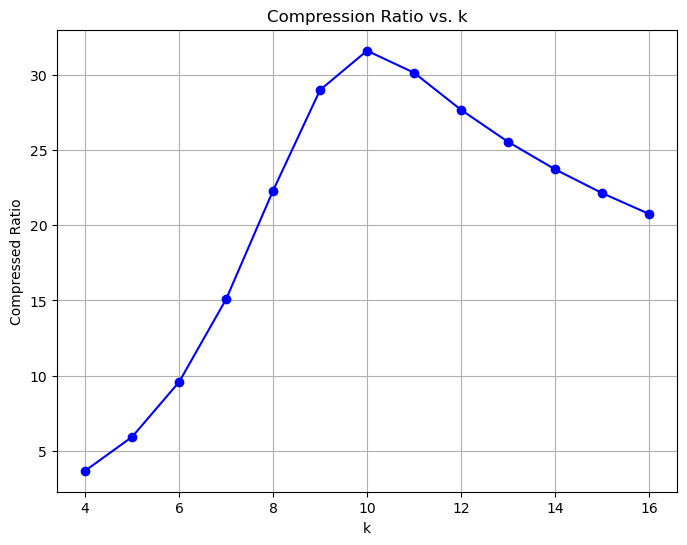

In [165]:
k_range = range(4,17)
ratios = [len(data) / len(compress(data, k)) for k in range(4,17)]

plt.figure(figsize=(8, 6))
plt.plot(k_range, ratios, marker='o', linestyle='-', color='b')
plt.title('Compression Ratio vs. k')
plt.xlabel('k')
plt.ylabel('Compressed Ratio')
plt.grid(True)
plt.show()

**(e)** Plot the length of the output file as $k$ varies from 4 to 16. Plot a horizontal
line at $n \times H(x)$, where $n$ is the length of the input file `p2c.txt` and $H(x)$ for
$p=0.003$.  Plot a second horizontal line for the length of the
file `p2c.txt.gz`. The value $n \times H(X)$ represents the theoretical lower bound 
achievable for lossless compression.  NOTE: To make this fair, consider the length in 
units of symbols.  Since your symbols are ascii characters, multiply the length of 
the gzip file by 8.


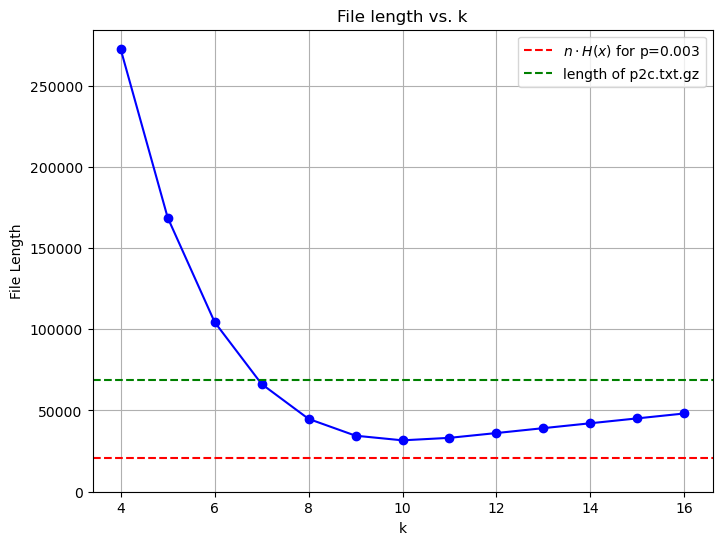

In [166]:
def entropy(p):
    return -p * log(p,2) + (1-p) * log(1-p,2)

k_range = range(4,17)
sizes = [len(compress(data, k)) for k in range(4,17)]
n = len(data)
entropy_len = n * entropy(p=0.003)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sizes, marker='o', linestyle='-', color='b')
plt.axhline(y=entropy_len, color='r', linestyle='--', label='$n\cdot H(x)$ for p=0.003')
plt.axhline(y=os.path.getsize("p2c.txt.gz")*8, color='g', linestyle='--', label='length of p2c.txt.gz')
#plt.axhline(y=os.path.getsize("p2c.txt"), color='magenta', linestyle='--', label='uncompressed')

plt.ylim(bottom=0)

plt.title('File length vs. k')
plt.xlabel('k')
plt.ylabel('File Length')
plt.grid(True)
plt.legend()
plt.show()

(f) How does $n \times H(X)$ from (b) compare to the length of the compressed files
using your zero run-length encoding vs. gzip?

**(g)** EXTRA CREDIT (10%). What happens if the file ends on a zero?  This encoding is only defined for files that end 
with a 1.  If we modify the encoding so that the last field in the file does not denote a run length but 
rather is either a 1 or 0 denoting whether the file ends in a complete (1) or incomplete (0) run.   
If the file ended on a complete run that means that the last input symbol was a 1.

$$\text{Table 2}$$
| input            |  output          | compression$\dagger$ |  explanation                                     |
|-----------------|------------------|--------------|-----------------------------------------------------------|
| 1               | 00000001         | 1/8          | zero zeroes then 1. Ending 0001 = complete run            |
| 01              | 00010001         | 1/4          | one zero then 1. Ending 0001 = complete run               |
| 11              | 000000000001     | 1/6          | 0 zeroes then 1, 0 zeros then 1. 0001 = complete run      |
| 0000000001      | 10010001         | 9/8=1.125    | $1001_2=9$, 9 zeroes then 1.  0001 = complete run         |
| 0010001         | 001000110001     | 7/8          | $0010_2=2$ zeroes, $0011_2=3$ zeroes. 0001 = complete run |
| 32 zeros then 1 | 1111111100100001 | 33/16=2.0625 | $15(1111_2) + 15(1111_2) + 2 = 32$ zeroes then 1          |
| 32 zeros        | 1111111100100000 | 33/16=2.0625 | ending 0000 = incomplete run                              |


In the last row we reduce 33 input symbols to 12 output symbols.  This has a compression
ratio of $33/12 = 2.75$

For $p=0.003$, (i.e., the probability of a 1 is 0.3%), implement zero run length encoding. 

Create a version of your code that handldes `p2c_zero_end.txt.gz` which is the original
`p2c.txt.gz` which ended with a zero.

In [185]:
import io
import sys
import unittest


def vassert(exp):
    if not exp:
        raise ValueError()

    
# I chose to follow the design pattern used by zlib and zstandard
# which allows compression parameter to passed as an optional argument
# to a compress method.
#
# Addendum: as described in the original problem, this encoding
# doesn't handle termination properly if the file ends with a zero.
# To handle this case, I am adding one additional behavior that is
# specific to the last k-width field in the file.  The last field 
# right before the EOF encodes whether the previous run ended in a 
# one or zero.  If the last value is a one then the last run ends 
# with a one.  If the last value is a zero then the last run is an 
#incomplete run.  
def compress2(data: bytes, k: int = 4) -> bytes:
    vassert(k > 0)
    max_rl = 2**k-1
    rl = 0
    buffer = bytearray()
    
    def enc_rl(c: str, rl: int) -> int:
        #print(f"enc_rl: bytes='{c}', rl={rl}")
        if c == '0':
            rl += 1
            if rl == max_rl:
                rlb = bin(rl)[2:].zfill(k).encode('ascii')
                buffer.extend(rlb)
                rl = 0
        elif c == '1':
            rlb = bin(rl)[2:].zfill(k).encode('ascii')
            buffer.extend(rlb)
            rl = 0
        return rl
    
    prev = b""
    for d in data:
        c = chr(d)
        if len(prev) != 0:
            rl = enc_rl(prev, rl)
        prev = c

    # handle the last run
    else:
        max_rl = rl + 1;  # force output if an incomplete run.
        enc_rl(prev, rl)
        
        if prev == "0":  # incomplete run
            buffer.extend(b"0".zfill(k))
            
        elif prev == "1": # complete run
            buffer.extend(b"1".zfill(k))        
    return bytes(buffer)

def decompress2(data: bytes, k: int = 4) -> bytes:
    vassert(k > 0)
    maxrl = 2**k-1
    dio = io.BytesIO(data)
    buffer = bytearray()
    rlbytes = dio.read(k)
    while True:
        prev_rlbytes = rlbytes
        rlbytes = dio.read(k)
        if len(rlbytes) == 0:  # EOF
            if len(prev_rlbytes) != 0:
                complete_run = int(prev_rlbytes.decode('ascii')) == 1
                if not complete_run:
                    # pop the last 1 that had been added.
                    buffer = buffer[:-1]
            break
        
        rl = int(prev_rlbytes.decode('ascii'), 2)
        buffer.extend(b"0"*rl)
        if rl != maxrl:
            buffer.append(ord("1"))
    return buffer        

class TestCompress2(unittest.TestCase):
    def test_edge_cases(self):
        try:
            compress2(None)
            self.assertTrue(False)
        except:
            pass

        try:
            compress2(b"010", -1)
            self.assertTrue(False)
        except ValueError:
            pass

        buf = compress(b"")
        self.assertEqual(len(buf), 0)

    def test_simple_cases(self):
        # This does not handle terminating edge condtion well. An ending 0000
        buf = compress2(b"1")
        self.assertEqual(buf, b"00000001") # 0000 for 1, 0001 to denote complete run.

        buf = compress2(b"0")
        self.assertEqual(buf, b"00010000") # 0001 for a run of 1 zero. 0000 to denote an incomplete run.

        buf = compress2(b"01")
        self.assertEqual(buf, b"00010001")

        buf = compress2(b"11")
        self.assertEqual(buf, b"000000000001")

        buf = compress2(b"00", k=3)
        self.assertEqual(buf, b"010000")

    def test_decompress2(self):
        self.assertEqual(decompress2(compress2(b"1")), b"1")
        self.assertEqual(decompress2(compress2(b"01")), b"01")
        self.assertEqual(decompress2(compress2(b"11")), b"11")
        
    def test_p2c_zero_end(self):
        with open("p2c_zero_end.txt", "rb") as fp:
            buf = fp.read()
        self.assertEqual(decompress2(compress2(buf)), buf)


unittest.main(argv=[''], verbosity=2, exit=False)  


test_3_percent (__main__.TestCompress.test_3_percent) ... ok
test_complicated_decompression (__main__.TestCompress.test_complicated_decompression) ... ok
test_decompression (__main__.TestCompress.test_decompression) ... ok
test_edge_cases (__main__.TestCompress.test_edge_cases) ... ok
test_more_complicated_cases (__main__.TestCompress.test_more_complicated_cases) ... ok
test_p2c (__main__.TestCompress.test_p2c) ... ok
test_simple_cases (__main__.TestCompress.test_simple_cases) ... ok
test_decompress2 (__main__.TestCompress2.test_decompress2) ... ok
test_edge_cases (__main__.TestCompress2.test_edge_cases) ... ok
test_p2c_zero_end (__main__.TestCompress2.test_p2c_zero_end) ... ok
test_simple_cases (__main__.TestCompress2.test_simple_cases) ... ok

----------------------------------------------------------------------
Ran 11 tests in 0.154s

OK


The following plot isn't required for extra credit, but it is a sanity check to ensure that the 
additional field appended to the end doesn't otherwise affect efficiency of the compression.

sizes: [272320, 168720, 104382, 66290, 44824, 34479, 31630, 33165, 36120, 39130, 42140, 45150, 48160]
sizes2: [272324, 168725, 104388, 66297, 44832, 34488, 31640, 33176, 36132, 39143, 42154, 45165, 48176]


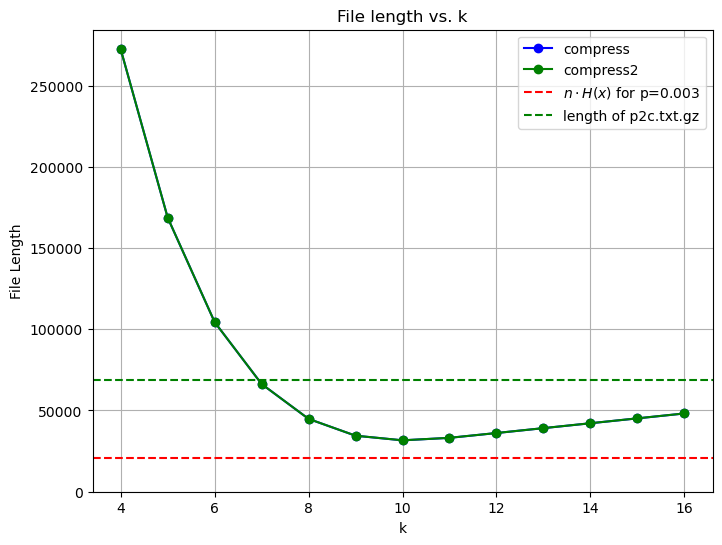

In [194]:
k_range = range(4,17)
sizes = [len(compress(data, k)) for k in range(4,17)]
sizes2 = [len(compress2(data, k)) for k in range(4,17)]
print(f"sizes: {sizes}")
print(f"sizes2: {sizes2}")
for s1, s2 in zip(sizes, sizes2):
    assert s2 > s1
n = len(data)
entropy_len = n * entropy(p=0.003)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sizes, marker='o', linestyle='-', color='b', label="compress")
plt.plot(k_range, sizes2, marker='o', linestyle='-', color='g', label="compress2")
plt.axhline(y=entropy_len, color='r', linestyle='--', label='$n\cdot H(x)$ for p=0.003')
plt.axhline(y=os.path.getsize("p2c.txt.gz")*8, color='g', linestyle='--', label='length of p2c.txt.gz')
#plt.axhline(y=os.path.getsize("p2c.txt"), color='magenta', linestyle='--', label='uncompressed')

plt.ylim(bottom=0)

plt.title('File length vs. k')
plt.xlabel('k')
plt.ylabel('File Length')
plt.grid(True)
plt.legend()
plt.show()

**Problem 3**

In classification problems, our classifier estimates the posterior 
probability $P(\omega_i | \bar{x})$ for every class.
This can be expressed as a vector of probabilities.
For example, if we are in the region of ambiguity for three different classes
such that $P(\omega_1 | \bar{x}) = 0.3$, $P(\omega_2 | \bar{x}) = 0.5$
and $P(\omega_3 | \bar{x}) = 0.2$.  The classifier doesn't know the 
true posterior probabilities so it estimates them.  

Let $\hat{P}(\omega_j | \bar{x})$ denote the estimated posterior probability
of class $j$ given feature vector $\bar{x}$.  The estimated posterior
probability is called the *predicted probability*.

Let $y$ denote the true class.  When discussing training sets, in
previous lectures we introduced $y^{(i)}$ as a scalar denoting the 
true class for the $i$th observation $(\mathbf{x}^{(i)}, y^{(i)})$.
We continue to use $y^{(i)}$ notation in the context of training sets.

Let $\hat{y}_j$ denotes the predicted probability for class $j$.
$\hat{y}_j$ estimates the posterior probability. Meaning

$$\hat{y}_j = \hat{P}(\omega_j | \bar{x}) \hspace{2in} (3.1)$$

Let $\mathbf{\hat{y}}$ denote the column vector of the predicted 
probabilities.

$$
\mathbf{\hat{y}} = \begin{bmatrix}
\hat{P}(y = 1 | \mathbf{x}) \\
\hat{P}(y = 2 | \mathbf{x}) \\
\vdots \\
\hat{P}(y = K | \mathbf{x})
\end{bmatrix}
$$

An accurate classifier would closely model the posterior
probabilities such that

$$
\mathbf{\hat{y}} \approx \begin{bmatrix}
P(y = 1 | \mathbf{x}) \\
P(y = 2 | \mathbf{x}) \\
\vdots \\
P(y = K | \mathbf{x})
\end{bmatrix}
$$

Thus for the example probabilities $P(\omega_1 | \bar{x}) = 0.3$, $P(\omega_2 | \bar{x}) = 0.5$
and $P(\omega_3 | \bar{x}) = 0.2$, $\mathbf{\hat{y}}$ becomes

$$
\mathbf{\hat{y}} \approx \begin{bmatrix}
0.3 \\
0.2 \\
0.5
\end{bmatrix}
$$

Cross-entropy is a widely used loss function in
machine learning, especially for multi-class classification tasks, 
because it measures a notion of distance between the predicted probability
distribution and the true distribution.

The cross-entropy between two probability distributions $P$ and $Q$
over the same set of events is defined as:

$$H(P, Q) = - \sum_{j} P(j) \log Q(j)$$

For classification we replace $P$ with a distribution that places
100% of the probabilty on the correct class, and we replace
$Q$ with $\mathbf{\hat{y}}$.

In other words
$P(y=k) = 1$ where $k$ is the true class and for all $j\neq k$, 
$P(y = j) = 0$.  This probability assignment can be represented using
an indicator function.

An indicator function is defined by

$$
\mathbb{1}\{ y = k \} =
\begin{cases}
1 & \text{if } y = k \\
0 & \text{if } y \neq k
\end{cases}
$$

Using an indicator function, cross entropy becomes

$$H(\mathbb{1}\{ y = k \}, \mathbf{\hat{y}}) = - \sum_{j=1}^K \mathbb{1}\{ y = k \} \log \mathbf{\hat{y}}_j \hspace{2in} (3.2)$$





Indicator functions are commonly used, but I prefer a less heavy notation using
what is called a *one-hot vector*.  As with indicator functions, one-hot vectors
are also heavily used in machine learning.

Let $\mathbf{y}(k)$ denote the one-hot vector wherein $y=k$ corresponds to the 
$k$th element being 1, e.g.,

$$
\mathbf{y}(k) = \begin{bmatrix}
0 \\
0 \\
\vdots \\
0 \\
1 \\
0 \\
\vdots \\
0
\end{bmatrix}
$$

where the $1$ above appears in the $k$th row of the column vector.

For brevity, we may simply refer to the one-hot vector as $\mathbf{y}$.  Note that $y$ is a 
scalar denoting the true class, and $\mathbf{y}$ is the one-hot vector with 100% of the
probability at the index of the true class.

Using matrix notation, (3.2) can be restated as 

$$H(\mathbf{y}, \mathbf{\hat{y}}) = - \mathbf{y}^T \log \mathbf{\hat{y}} \hspace{2in} (3.3)$$

In classification problems, the loss function is often denoted by a calligraphic L, i.e.,
$\mathcal{L}$, thus when we use cross-entropy $H$ as a loss function, we rewrite (3.3) as

$$\mathcal{L}(\mathbf{y}, \mathbf{\hat{y}}) = - \mathbf{y}^T \log \mathbf{\hat{y}} \hspace{2in} (3.4)$$

**(a)** Suppose we have a four-class classification problem 
$K = 4$, and for a particular data point, the true label is $y=3$. Write the one-hot vector $\mathbf{y}$ for y=3.


**Answer 3(a):**

$$\mathbf{y} = \begin{bmatrix}
  0 \\
  0 \\
  1 \\
  0
\end{bmatrix}
$$

**(b)** The predicted probability vector $\mathbf{\hat{y}}$ for this data point
output from our model is:

$$
\mathbf{\hat{y}} = \begin{bmatrix}
0.1 \\
0.2 \\
0.6 \\
0.1
\end{bmatrix}
$$

Compute the cross-entropy loss $\mathcal{L}$ when y = 3.

**Answer 3(b)**


The problem does not clearly stipulate whether we use $\log_2$ or $\ln$.  The result would be
a constant factor between them but this would affect all losses proportionally and thus the relative
loss would be the same.  It wouldn't affect convergence on the estimated posterior probabilities
for each class when we're using loss to drive learning (e.g., using gradient descent... which admittedly
we have not discussed yet).

Thus we accept either answer.

\begin{align}
\mathcal{L}(\mathbf{y}, \mathbf{\hat{y}}) &= - \mathbf{y}^T \ln \mathbf{\hat{y}} \\
    &= -1 \cdot \ln 0.6 \approx 0.511
\end{align}

or 

\begin{align}
\mathcal{L}(\mathbf{y}, \mathbf{\hat{y}}) &= - \mathbf{y}^T \log_2 \mathbf{\hat{y}} \\
    &= -1 \cdot \log_2 0.6 \approx 0.737
\end{align}


**(c)** If the true class were $y=1$, what would $\mathcal{L}$ equal?

**Answer (c)**

\begin{align}
\mathcal{L}(\mathbf{y}, \mathbf{\hat{y}}) &= - \mathbf{y}^T \ln \mathbf{\hat{y}} \\
    &= -1 \cdot \ln 0.1 \approx 2.302
\end{align}

or 

\begin{align}
\mathcal{L}(\mathbf{y}, \mathbf{\hat{y}}) &= - \mathbf{y}^T \log_2 \mathbf{\hat{y}} \\
    &= -1 \cdot \log_2 0.1 \approx 3.322
\end{align}


**(d)** If the predicted probability vector is itself a one-hot vector where $\hat{y}_k = 1$ and the true class is $y=k$, what is the loss $\mathcal{L}$? 

**Answwer (d)**

$$\mathcal{L}(\mathbf{y}, \mathbf{\hat{y}}) = -1 \log 1 = 0$$

In other words, no loss.


**(e)** The classifier is certain that $\mathbf{x}$ corresponds to class 4, i.e., $\hat{y}_4 = 1$, but the true class is $y=3$.  What happens to $\mathcal{L}$.  Aside: this problem can be avoided by clipping the predicted probabilities such that 
$\hat{y}_k \in [\epsilon, 1 - \epsilon]$ where $\epsilon$  is a small value like $10^{-8}$, to avoid $\log(0)$ and $\log(1)$.


**Answwer (e)**

$$\mathcal{L}(\mathbf{y}, \mathbf{\hat{y}}) = -\begin{bmatrix}
0 \\
0 \\
1 \\
0
\end{bmatrix}^T \log
\begin{bmatrix}
1 \\
0 \\
0 \\
0
\end{bmatrix} = -0 \log 1 - 0 \log 0 - 1 \log 0 - 0 \log 0\hspace{1in}(3.1)$$


The 

$$\lim_{x \to 0^+} x \log(x) = 0$$

can be derived using L’Hopital’s Rule.  As such it seems justified to set the $0 \log 0$ 
terms to 0.  

$0 \log 1 = 0 \cdot 0 = 0$ which presents no difficulty.

$(3.1)$ thus becomes.

$$-1 \log 0 = ?$$

If take the limit 

$$
-\lim_{x \to 0^+} \log(x) = \infty.
$$

If we use a similar argument to how we eliminated the $0 \log 0$ then we would set
$\mathcal{L}$ to $\infty$.  Otherwise we end up with $\mathcal{L}$ being undefined.
If we were computing a gradient for adjusting weights in a neural network, 
an $\infty$ gradient would break learning.  

Hence we either clamp loss or clamp the magnitude of the final gradient vector.  We'll talk about
gradient vectors and gradient descent when we introduce logistic regression.

My answer is quite verbose.  We accepted simply $\infty$ as a valid answer.
